In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = '..\combined_keypoints.csv'
print(f"Loading data from {data_path}")
df = pd.read_csv(data_path)

print("First few rows of the dataset:")
print(df.head())

X = df.drop(columns=['Class'])
y = df['Class']

le = LabelEncoder()
y = le.fit_transform(y)
print("Class labels encoded.")

Loading data from ..\combined_keypoints.csv
First few rows of the dataset:
        Class    Nose_x    Nose_y  Nose_conf  LeftEye_x  LeftEye_y  \
0  Warrior_II  0.275027  0.441496   0.838373   0.257330   0.454769   
1  Warrior_II  0.361404  0.488448   0.632348   0.354708   0.496576   
2  Warrior_II  0.226947  0.543324   0.787434   0.213398   0.533082   
3  Warrior_II  0.392478  0.374899   0.328839   0.381358   0.370187   
4  Warrior_II  0.223151  0.476531   0.887696   0.211527   0.493164   

   LeftEye_conf  RightEye_x  RightEye_y  RightEye_conf  ...  LeftKnee_conf  \
0      0.874609    0.258129    0.449623       0.896995  ...       0.941765   
1      0.715429    0.351345    0.491862       0.855811  ...       0.829439   
2      0.857410    0.214061    0.525327       0.864843  ...       0.923154   
3      0.546548    0.383478    0.369107       0.577419  ...       0.324949   
4      0.910345    0.209859    0.482766       0.860895  ...       0.828863   

   RightKnee_x  RightKnee_y  RightK

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training and testing sets. Training size: {X_train.shape[0]}, Testing size: {X_test.shape[0]}")

Data split into training and testing sets. Training size: 10981, Testing size: 2746


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features standardized.")

selector = SelectKBest(f_classif, k=30)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
print("Feature selection applied.")

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), ('gb', gb_model), ('lr', lr_model)],
    voting='soft')

param_dist = {
    'n_estimators': [140, 150, 160],
    'max_depth': [40, 45, 50, 55],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}

Features standardized.
Feature selection applied.


In [ ]:
print("Starting RandomizedSearchCV for Random Forest tuning.")
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=50,
    scoring='accuracy', cv=10, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("RandomizedSearchCV completed.")

best_rf_model = random_search.best_estimator_
print(f"Best Random Forest parameters found: {random_search.best_params_}")
print(f"Best Random Forest cross-validation score: {random_search.best_score_:.4f}")

Starting RandomizedSearchCV for Random Forest tuning.
Fitting 10 folds for each of 50 candidates, totalling 500 fits
RandomizedSearchCV completed.
Best Random Forest parameters found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 45, 'bootstrap': False}
Best Random Forest cross-validation score: 0.6873


In [ ]:
print("Training the best Random Forest model with the best parameters.")
best_rf_model.fit(X_train, y_train)

Training the best Random Forest model with the best parameters.


RandomForestClassifier(bootstrap=False, max_depth=45, min_samples_leaf=2,
                       n_estimators=150, random_state=42)

In [ ]:
print("Evaluating the best Random Forest model.")
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Best Random Forest Model Accuracy: {accuracy_rf:.4f}")
print(f"Best Random Forest Model Precision: {precision_rf:.4f}")
print(f"Best Random Forest Model Recall: {recall_rf:.4f}")
print(f"Best Random Forest Model F1 Score: {f1_rf:.4f}")

print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Evaluating the best Random Forest model.
Best Random Forest Model Accuracy: 0.6584
Best Random Forest Model Precision: 0.6617
Best Random Forest Model Recall: 0.6584
Best Random Forest Model F1 Score: 0.6502
Best Random Forest Model Classification Report:
                                precision    recall  f1-score   support

       Bharadvaja's_Twist_pose       0.70      0.61      0.65        23
                          Boat       0.70      0.85      0.77        47
                   Bound_Angle       0.78      0.49      0.60        37
           Bow_or_Dhanurasana_       0.79      0.73      0.76        30
                        Bridge       0.81      0.81      0.81        27
                         Camel       0.84      0.86      0.85        36
                       Cat_Cow       0.93      0.85      0.89        47
                         Chair       0.74      0.62      0.68        37
                         Child       0.57      0.89      0.70        35
                       

Generating Best Random Forest Model confusion matrix.


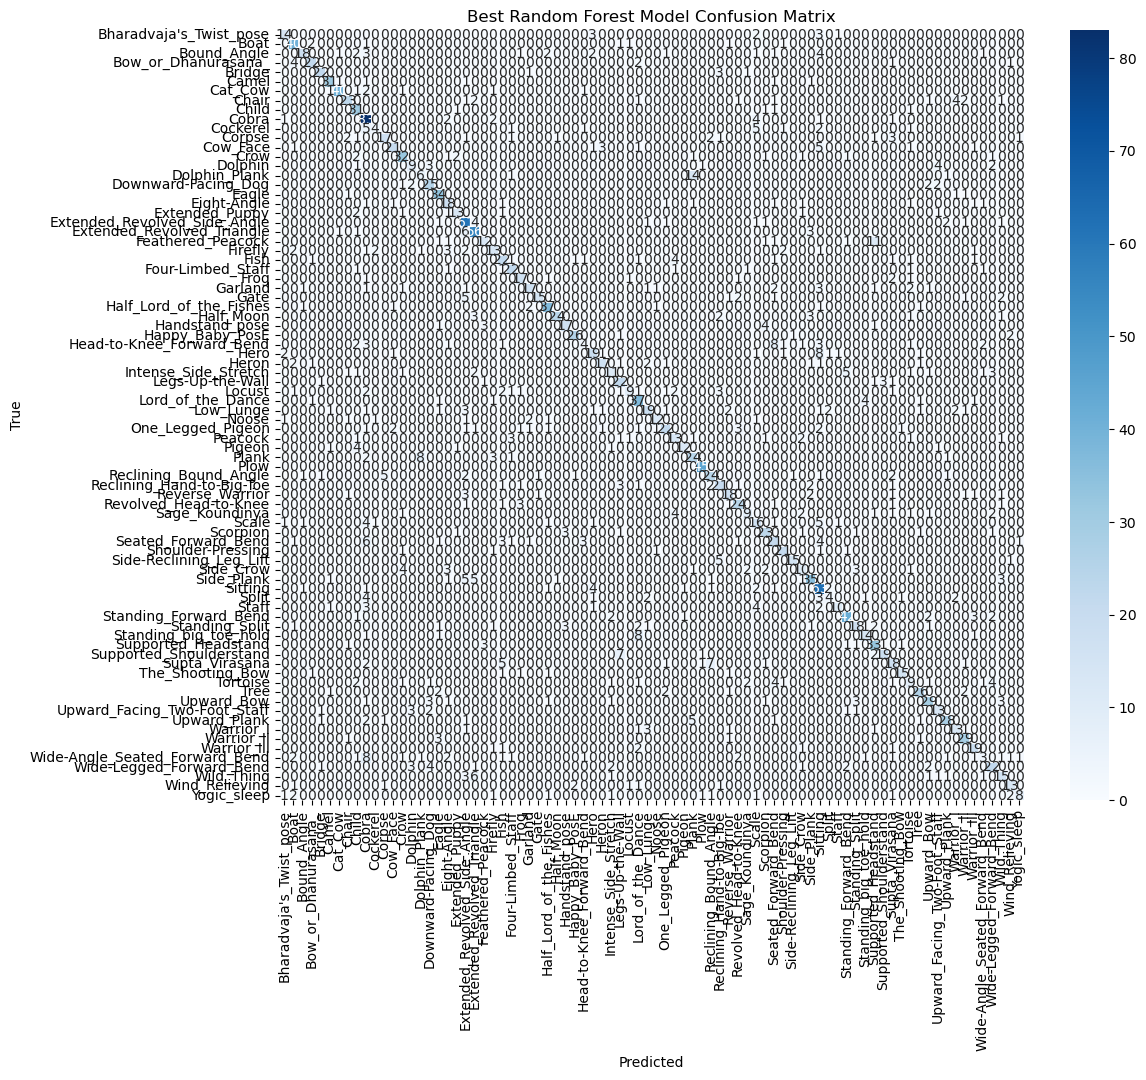

Best Random Forest Model Confusion matrix displayed.


In [ ]:
print("Generating Best Random Forest Model confusion matrix.")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Best Random Forest Model Confusion Matrix')
plt.show()
print("Best Random Forest Model Confusion matrix displayed.")

In [ ]:
best_rf_model_path = 'best_rf_model.pkl'
joblib.dump(best_rf_model, best_rf_model_path)
print(f"Trained best Random Forest model saved to {best_rf_model_path}")

Trained best Random Forest model saved to best_rf_model.pkl
